In [3]:
# Импорт библиотек
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
# загрузка датасета 1
data1 = pd.read_excel('X_bp.xlsx')
data1

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(11)
me

In [6]:
# загрузка датасета 2
data2 = pd.read_excel('X_nup.xlsx')
data2

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   float64
 1   Угол нашивки, град  1040 non-null   float64
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(4)
memory usage: 32.6 KB


In [8]:
# объединение датасетов по индексу, тип объединения inner
df = pd.merge(data1, data2, how = 'inner', left_index = True, right_index = True)
df.head()

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,0.0,4.0,57.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1.0,0.0,4.0,60.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2.0,0.0,4.0,70.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3.0,0.0,5.0,47.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4.0,0.0,5.0,57.0


In [9]:
# в инфо видим лишние колонки
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0_x                          1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
 11  Unnamed: 0_y     

In [10]:
# дропаем их
df1 = df.drop(df.columns[[0,11]], axis=1)
df1.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [12]:
# проверяем пропуски
df1.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [13]:
# проверяем дубли
df.duplicated().sum()

0

In [14]:
# смотрим описание (для каждой колонки получаем среднее, медианное значение и т.д.)
df1.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


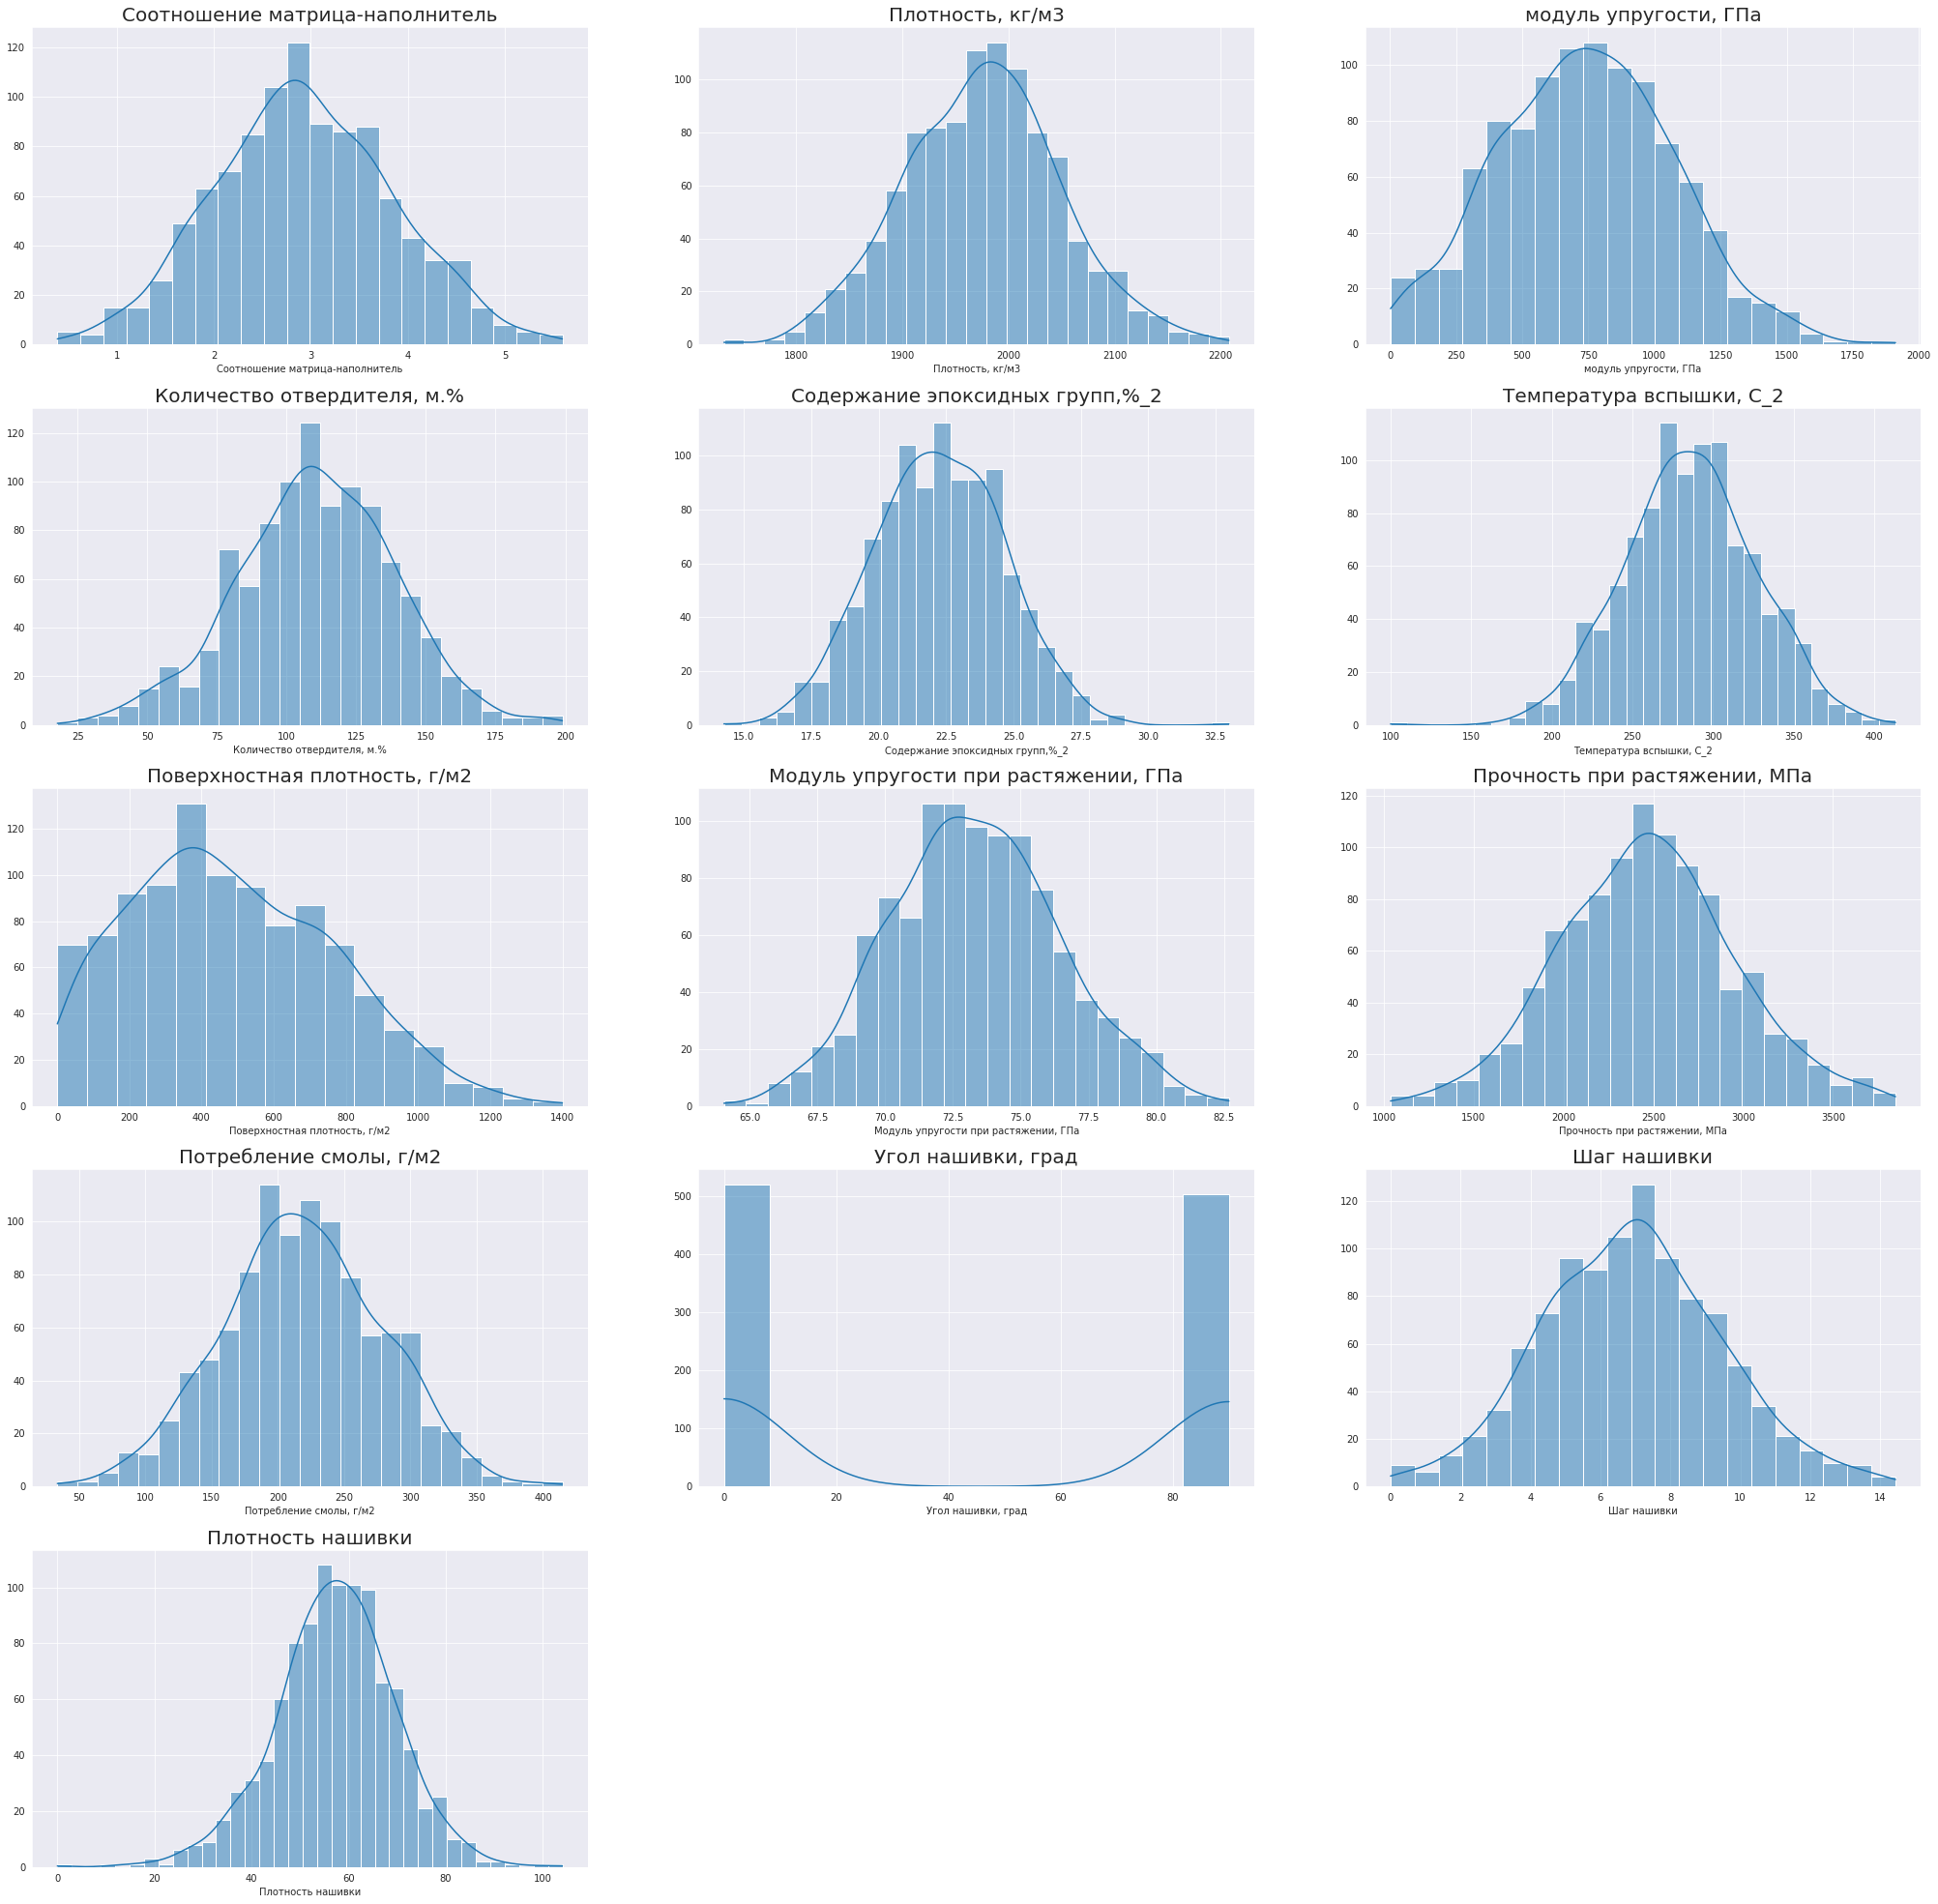

In [15]:
# гистрограмма распределения каждой переменной
plt.figure(figsize=(35,35))
a = 5
b = 3
c = 1

for col in df1.columns:
    plt.subplot(a, b, c)
    sns.histplot(data = df1[col], kde=True)
    plt.ylabel(None)    
    plt.title(col, size = 20)
    c+=1

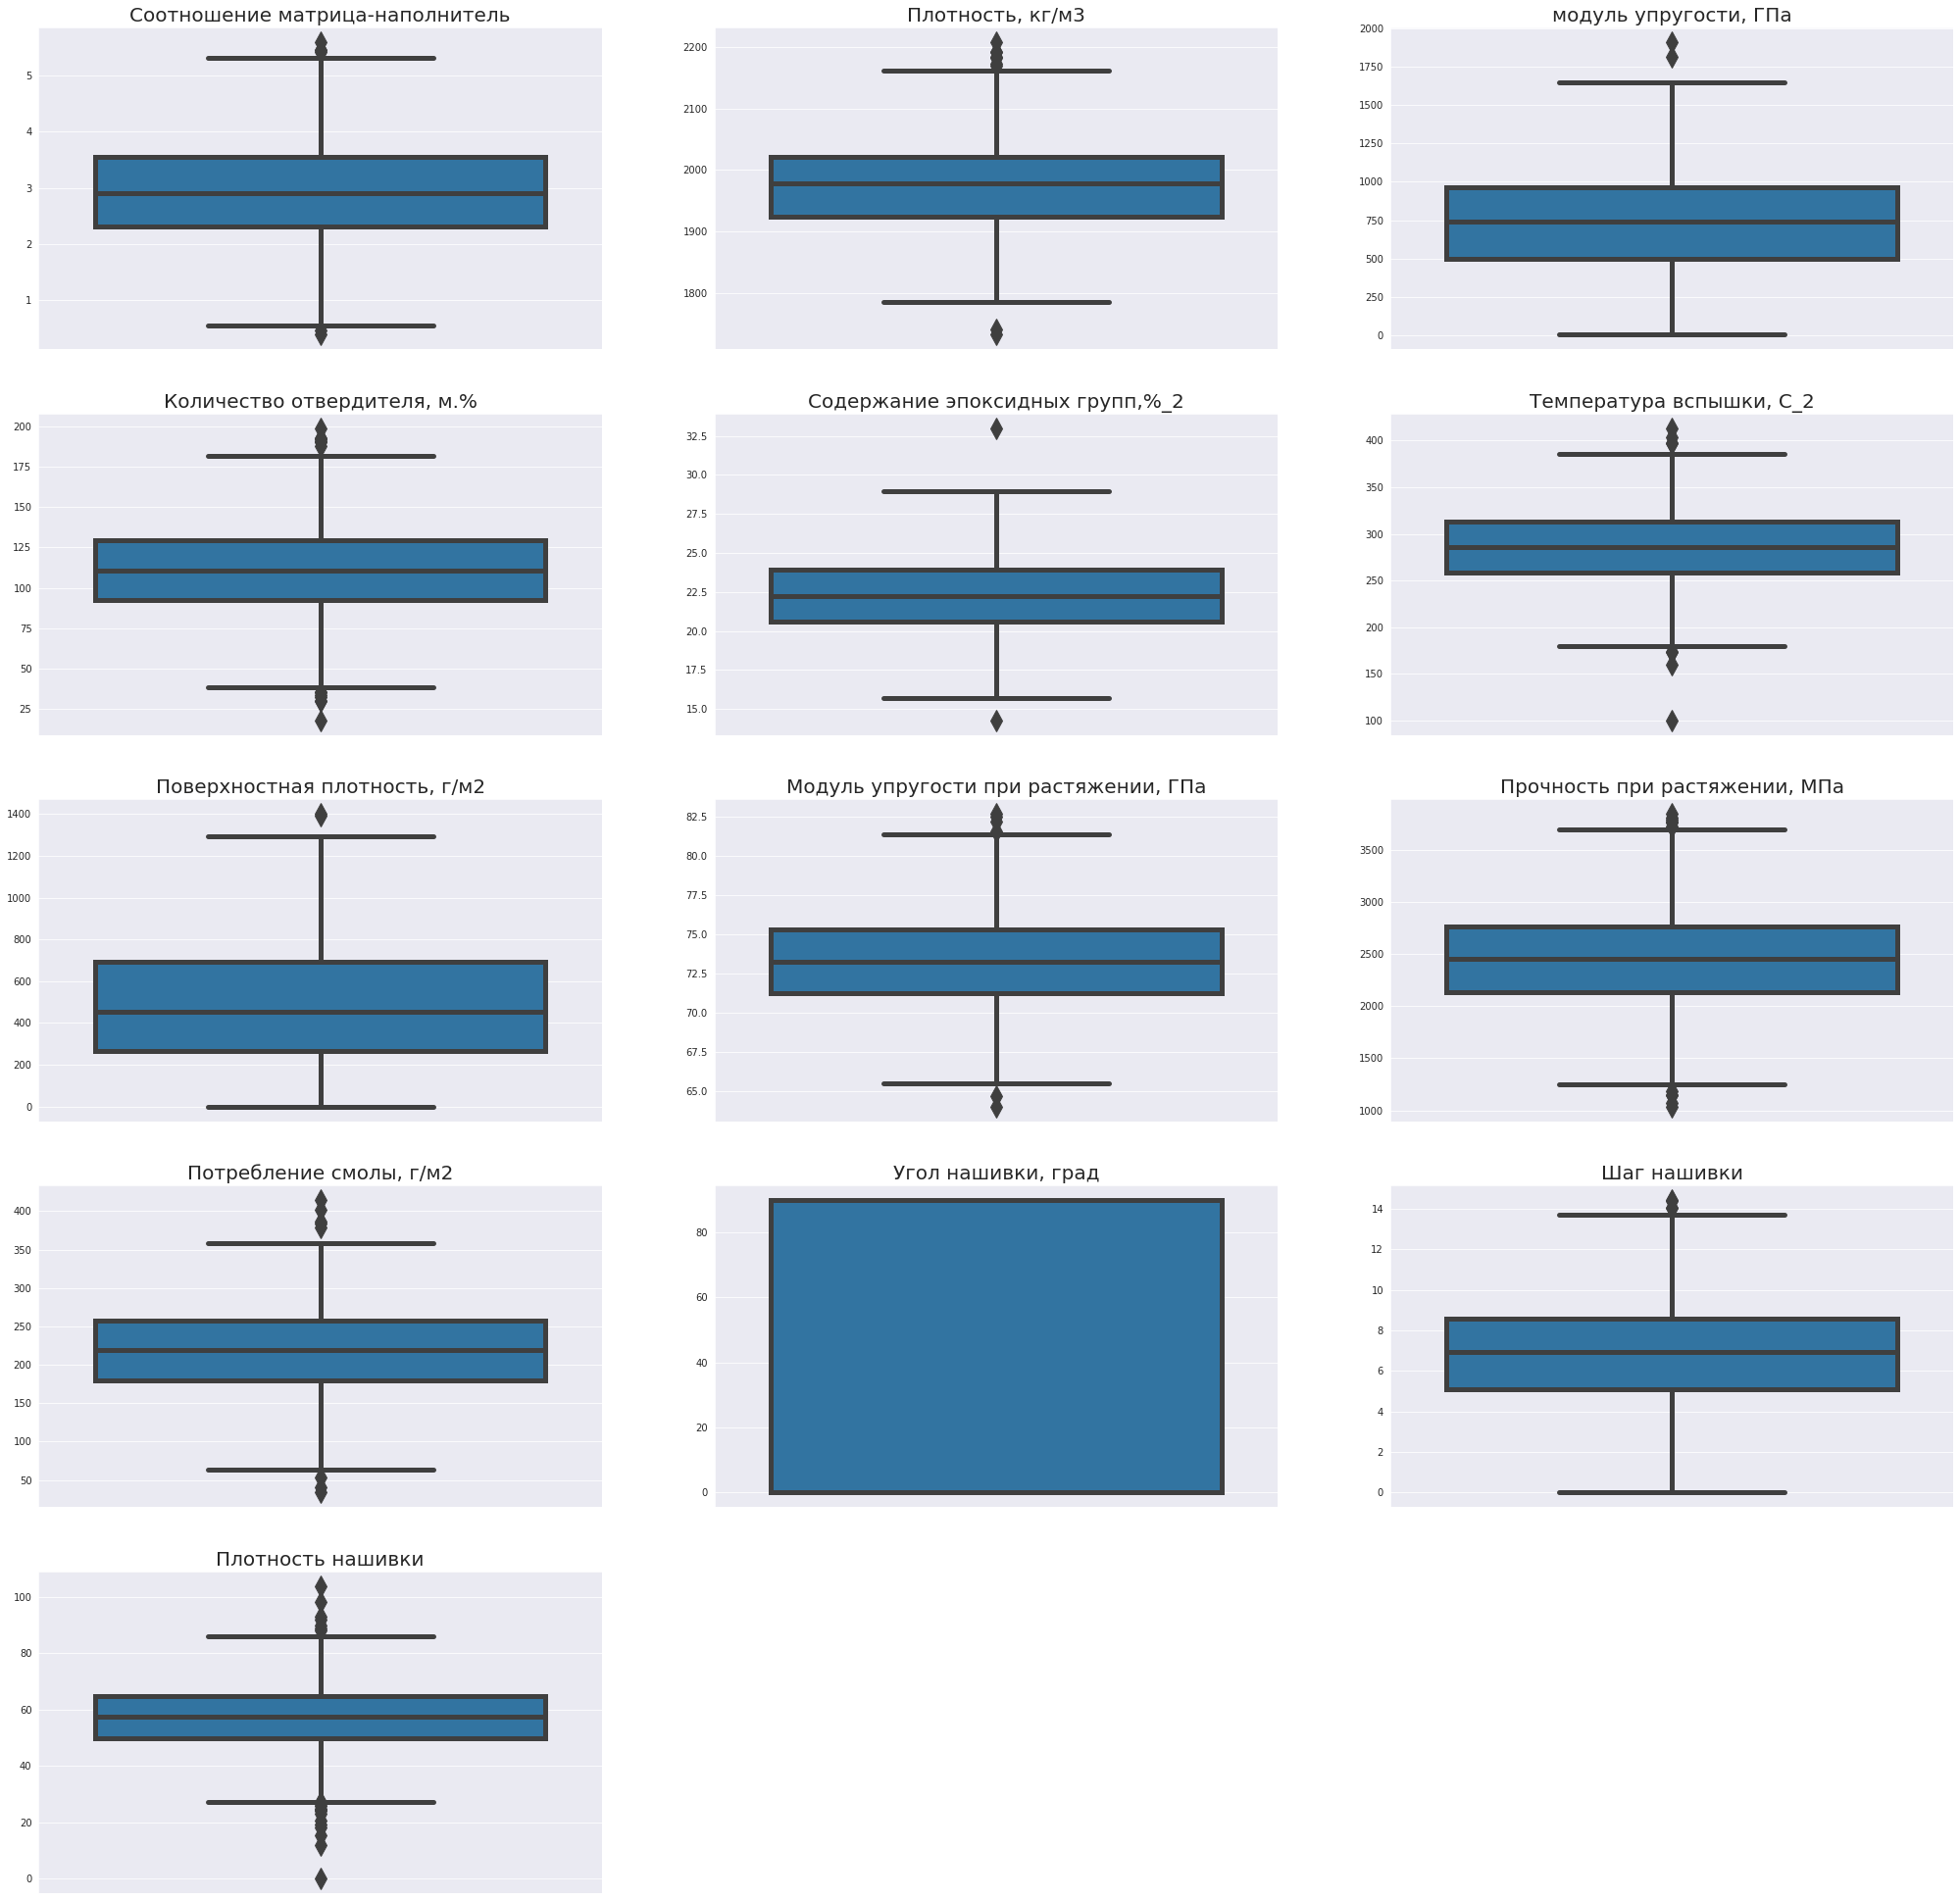

In [16]:
# диаграмма ящика с усами по каждой переменной
plt.figure(figsize=(35,35))
a = 5
b = 3
c = 1

for col in df1.columns:
    plt.subplot(a, b, c)
    sns.boxplot(data = df1, y=df1[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    c+=1

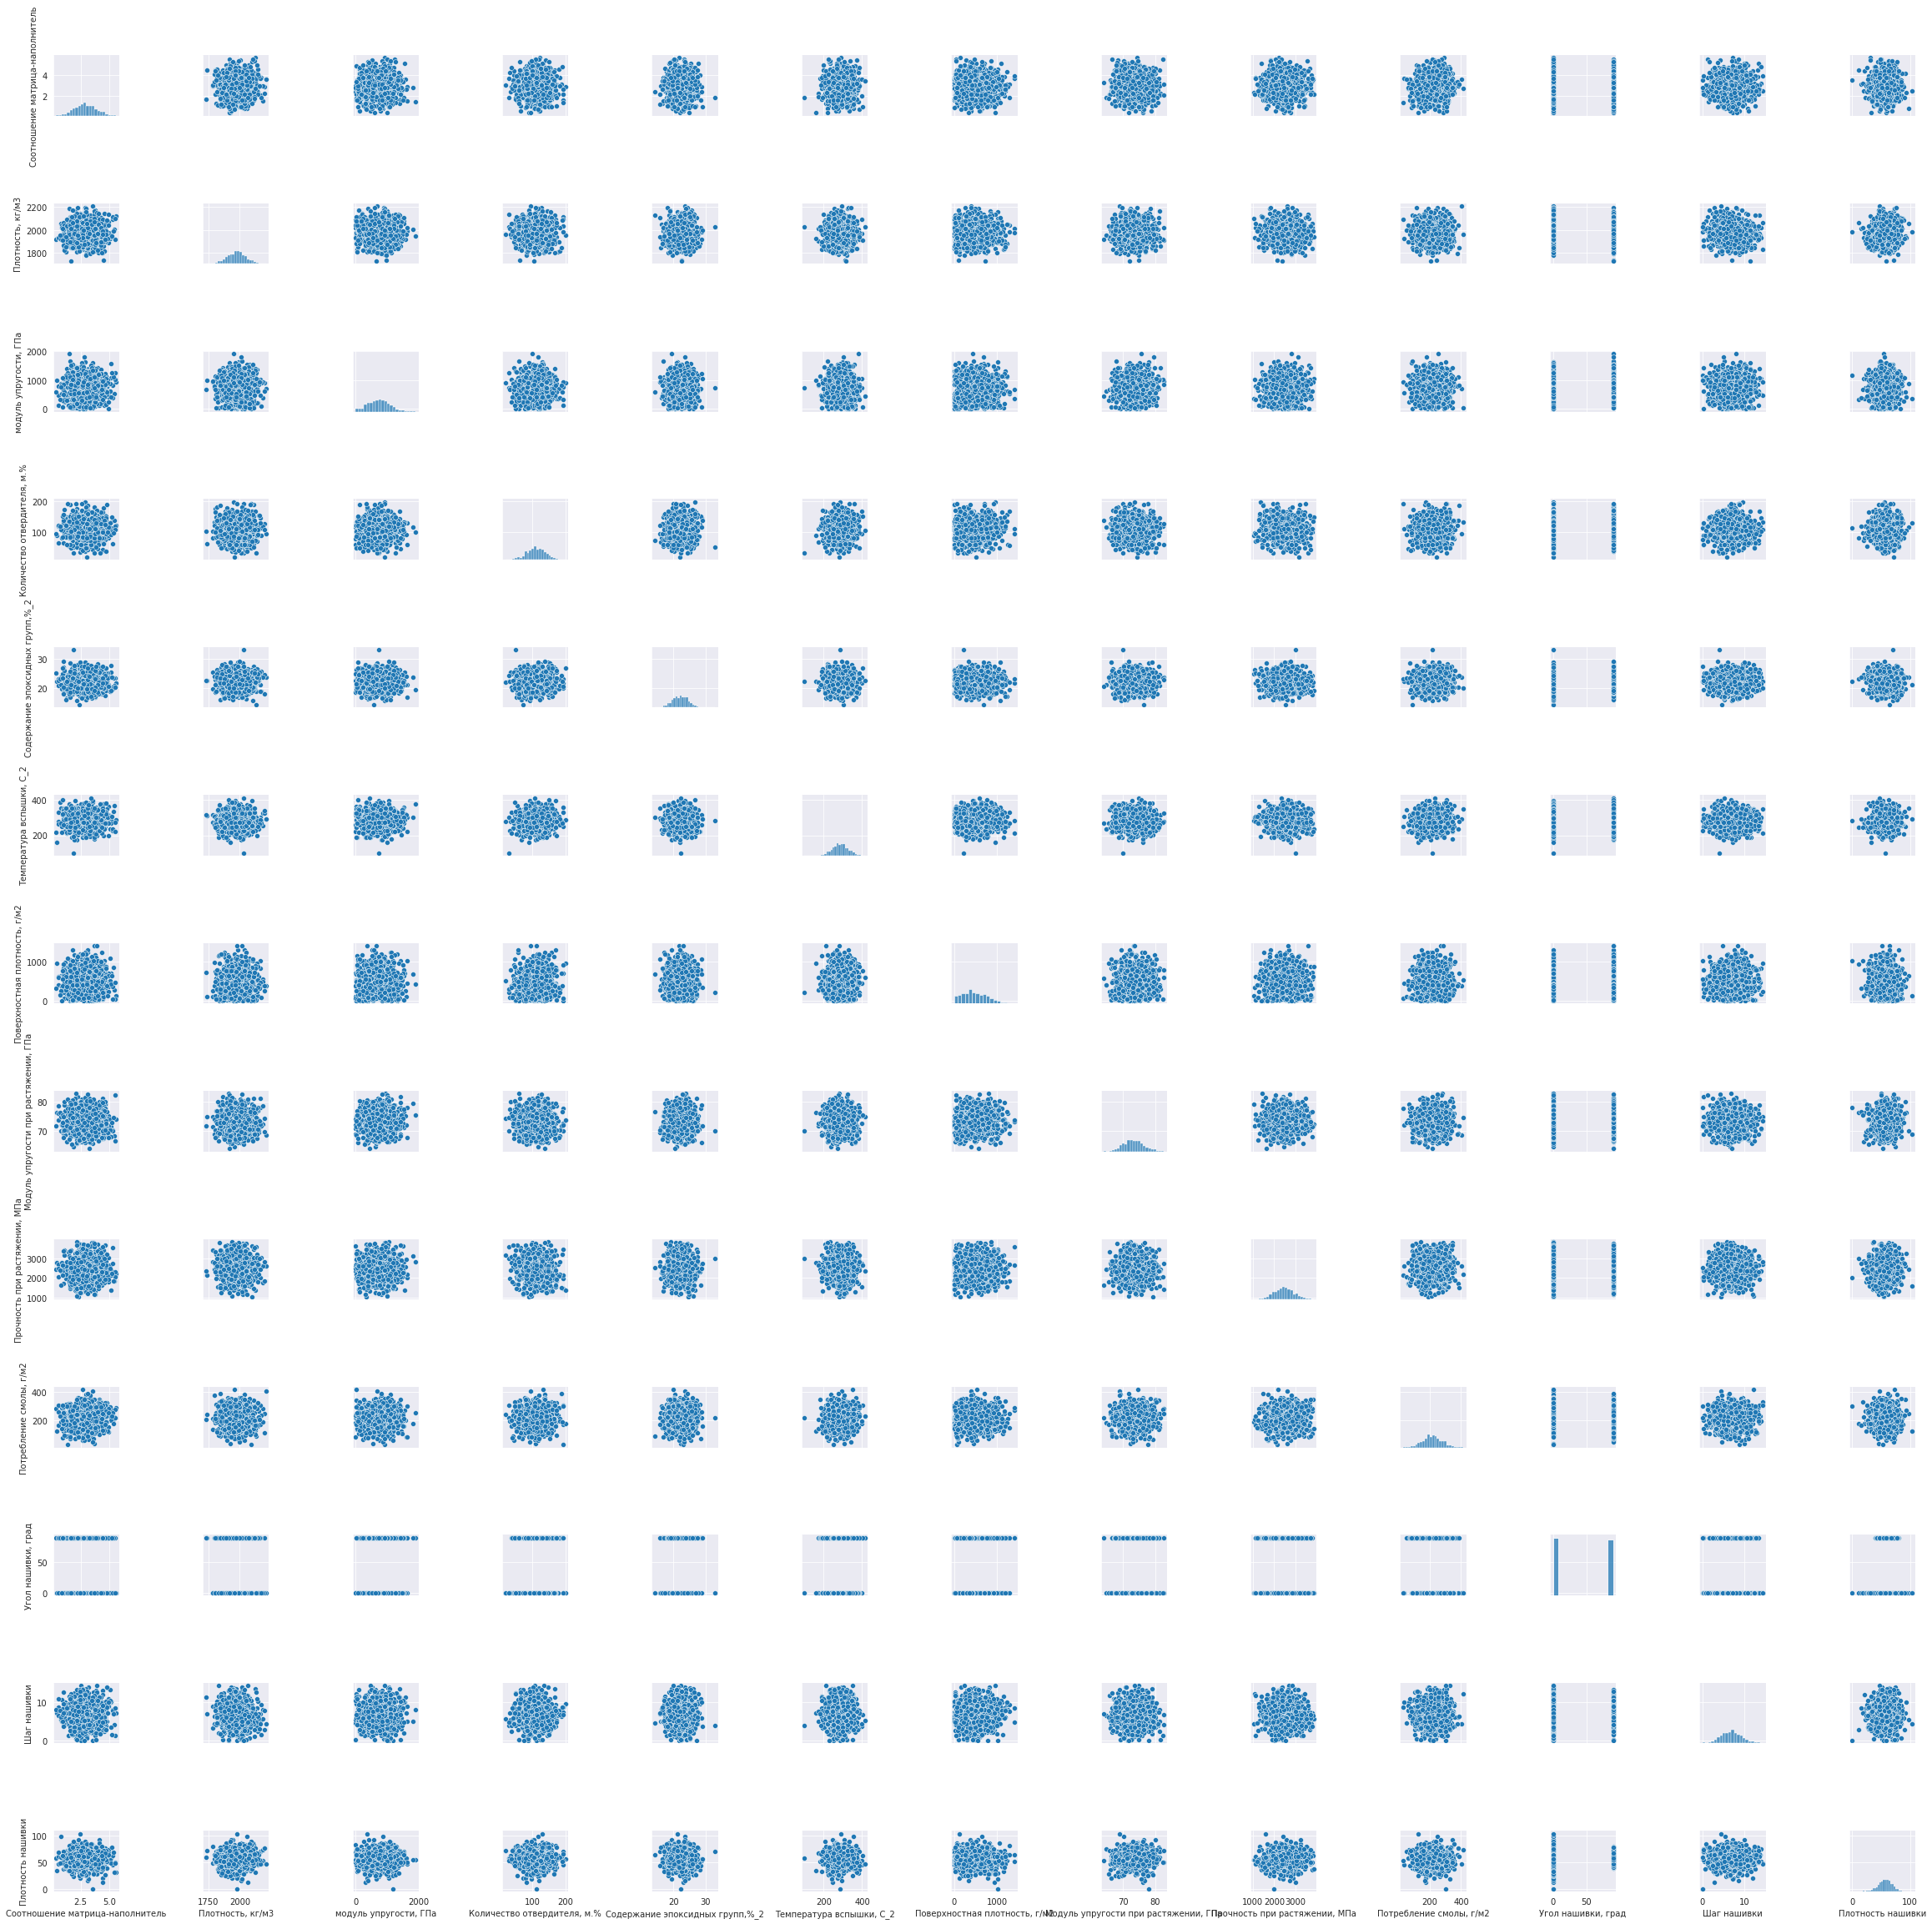

In [17]:
# попарные графики рассеяния точек
sns.pairplot (df1)

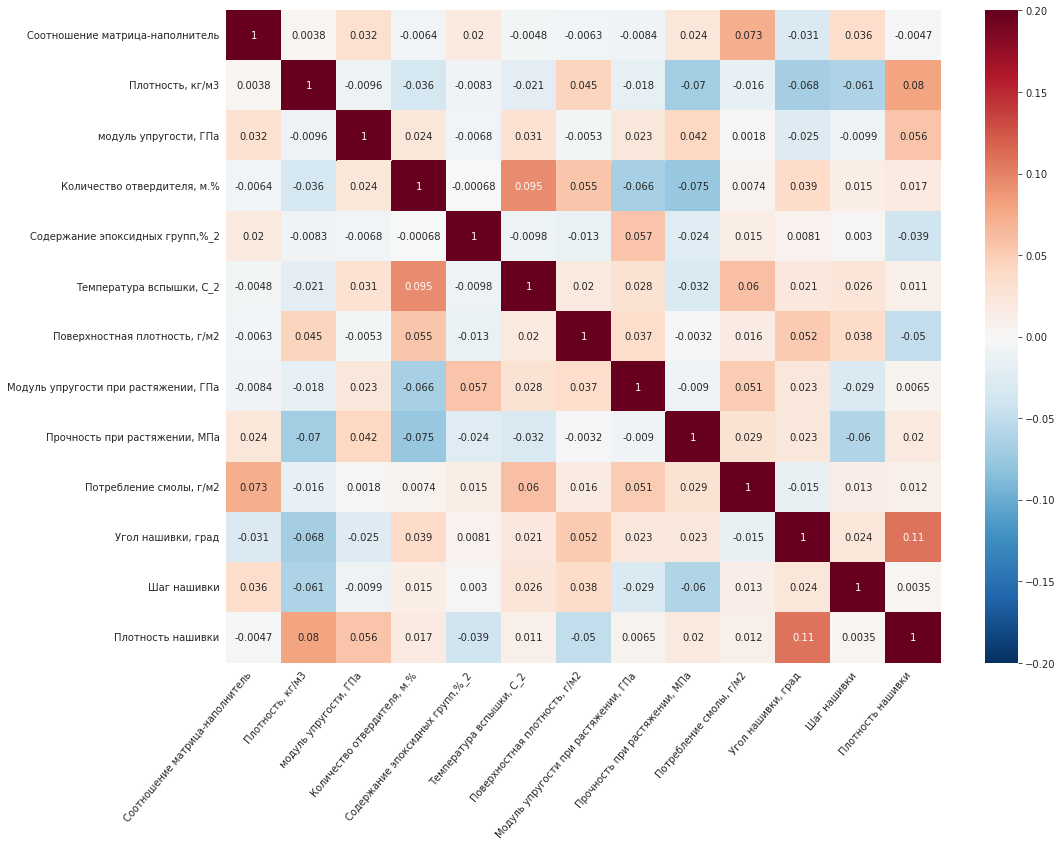

In [18]:
# смотрим корреляцию между переменными
plt.figure(figsize=(16,12))
sns.heatmap(
    df1.corr(),        
    cmap='RdBu_r',
    annot=True, 
    vmin=-0.2, vmax=0.2)
plt.xticks(rotation=50, ha='right'); 

In [19]:
# ищем выбросы в разных колонках
for col in df1.columns:
  q3,q1 = np.percentile(df1.loc[:,col],[75,25])
  iqr = q3 - q1

  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr

  df1.loc[df1[col] < lower,col] = np.nan
  df1.loc[df1[col] > upper,col] = np.nan

df1.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [20]:
# дропаем их
df1 = df1.dropna(axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки       

In [21]:
# нормализация данных
mms = MinMaxScaler()
df2 = pd.DataFrame(mms.fit_transform(df1), columns = df1.columns, index=df1.index)
df2.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Переходим к построению моделей для прогноза модуля упругости при растяжении и прочности при растяжении

In [22]:
#добавляем библиотеки 
from sklearn.model_selection import train_test_split  # При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
# GridSearchCV исчерпывающе рассматриваются все комбинации параметров, а RandomizedSearchCV можно выбрать заданное количество кандидатов из пространства параметров с указанным распределением

from sklearn.linear_model import LinearRegression   # линейная регрессия
from sklearn.neighbors import KNeighborsRegressor  # метод ближайших соседей 
from sklearn.ensemble import RandomForestRegressor # случайный лес
from sklearn.neural_network import MLPRegressor # многослойный персепртрон, нейросеть с учителем (Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель)

from sklearn.metrics import mean_absolute_percentage_error # метрика для проверки 

In [23]:
# делаем разбивку данных для обучения
x_uprugost = df2.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_prochnost = df2.drop(['Прочность при растяжении, МПа'], axis=1)
y_uprugost = df2[['Модуль упругости при растяжении, ГПа']]
y_prochnost = df2[['Прочность при растяжении, МПа']]

X_train_uprugost, X_test_uprugost, y_train_uprugost, y_test_uprugost = train_test_split(x_uprugost, y_uprugost, test_size=0.3, random_state=42)
X_train_prochnost, X_test_prochnost, y_train_prochnost, y_test_prochnost = train_test_split(x_prochnost, y_prochnost, test_size=0.3, random_state=42)

In [24]:
# линейная регрессия (упругость)
lr = LinearRegression()
lr_parameters = {
    'fit_intercept' : ['True', 'False']
}       # Когда fit_intercept=True линия наилучшего соответствия может «соответствовать» оси Y. При fit_intercept=False перехват принудительно перемещается в начало координат (0, 0)
GSCV_lr_uprugost = GridSearchCV(lr, lr_parameters, n_jobs=-1, cv=10) # Количество заданий для параллельного выполнения, -1 означает использование всех процессоров. cv - кросс валидация, по умолчанию 5
GSCV_lr_uprugost.fit(X_train_uprugost, y_train_uprugost)
GSCV_lr_uprugost.best_params_

{'fit_intercept': 'True'}

In [25]:
lr_uprugost = GSCV_lr_uprugost.best_estimator_
lr_uprugost_result = pd.DataFrame({
   'Model': 'LR_uprugost', 
   'MAPE': mean_absolute_percentage_error(y_test_uprugost, lr_uprugost.predict(X_test_uprugost)), 
   'R2': lr_uprugost.score(X_test_uprugost, y_test_uprugost).round(3)
}, index=['1'])

In [26]:
# метод ближайших соседей (упругость)
kn = KNeighborsRegressor()
kn_parameters = {'n_neighbors' : range(1, 301, 2),  # кол-во соседей
          'weights' : ['uniform', 'distance'],   # веса, как однородные имеющие один вес, так и те что теряют вес на дистанции
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']   # все алгоритмы
          }
GSCV_kn_uprugost = GridSearchCV(kn, kn_parameters, n_jobs=-1, cv=10)
GSCV_kn_uprugost.fit(X_train_uprugost, y_train_uprugost)
GSCV_kn_uprugost.best_params_

{'algorithm': 'auto', 'n_neighbors': 183, 'weights': 'uniform'}

In [27]:
kn_uprugost = GSCV_kn_uprugost.best_estimator_
kn_uprugost_result = pd.DataFrame({
   'Model': 'KN_uprugost', 
   'MAPE': mean_absolute_percentage_error(y_test_uprugost, kn_uprugost.predict(X_test_uprugost)), 
   'R2': kn_uprugost.score(X_test_uprugost, y_test_uprugost).round(3)
}, index=['2'])

In [28]:
# случайный лес (упругость)
rf = RandomForestRegressor()
rf_parameters = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rf_uprugost = RandomizedSearchCV(rf, rf_parameters, n_jobs=-1, cv=10, verbose=4)
RSCV_rf_uprugost.fit(X_train_uprugost, np.ravel(y_train_uprugost))
RSCV_rf_uprugost.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 920,
 'min_samples_split': 30,
 'min_samples_leaf': 3,
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': 'False'}

In [29]:
rf_uprugost = RSCV_rf_uprugost.best_estimator_
rf_uprugost_result = pd.DataFrame({
   'Model': 'RF_uprugost', 
   'MAPE': mean_absolute_percentage_error(y_test_uprugost, rf_uprugost.predict(X_test_uprugost)), 
   'R2': rf_uprugost.score(X_test_uprugost, y_test_uprugost).round(3)
}, index=["3"])

In [30]:
# собираем все метрики для оценки эффективности моделей
metrics_models_uprugost = pd.DataFrame()
metrics_models_uprugost = pd.concat([metrics_models_uprugost, lr_uprugost_result, kn_uprugost_result, rf_uprugost_result])
metrics_models_uprugost

,Model,MAPE,R2
1,LR_uprugost,0.453354,-0.005
2,KN_uprugost,0.449671,-0.003
3,RF_uprugost,0.445775,-0.005


Cредняя абсолютная процентная ошибка между значениями, предсказанными моделью, и фактическими значениями составляет 45%. А коэфициент детерминации ~0 , что говорит о том, что данные прогнозируемые моделями равны усреднённым значениям. Такие низкие показатели работы моделей обусловлены слабой корреляцией данных.


In [31]:
# линейная регрессия (прочность)
GSCV_lr_prochnost = GridSearchCV(lr, lr_parameters, n_jobs=-1, cv=10)
GSCV_lr_prochnost.fit(X_train_prochnost, y_train_prochnost)
GSCV_lr_prochnost.best_params_

{'fit_intercept': 'True'}

In [32]:
lr_prochnost = GSCV_lr_prochnost.best_estimator_
lr_prochnost_result = pd.DataFrame({
   'Model': 'LR_prochnost', 
   'MAPE': mean_absolute_percentage_error(y_test_prochnost, lr_prochnost.predict(X_test_prochnost)), 
   'R2': lr_prochnost.score(X_test_prochnost, y_test_prochnost).round(3)
}, index=['1'])

In [33]:
# метод ближайших соседей (прочность)
GSCV_kn_prochnost = GridSearchCV(kn, kn_parameters, n_jobs=-1, cv=10)
GSCV_kn_prochnost.fit(X_train_prochnost, y_train_prochnost)
GSCV_kn_prochnost.best_params_

{'algorithm': 'auto', 'n_neighbors': 243, 'weights': 'uniform'}

In [34]:
kn_prochnost = GSCV_kn_prochnost.best_estimator_
kn_prochnost_result = pd.DataFrame({
   'Model': 'KN_prochnost', 
   'MAPE': mean_absolute_percentage_error(y_test_prochnost, kn_prochnost.predict(X_test_prochnost)), 
   'R2': kn_prochnost.score(X_test_prochnost, y_test_prochnost).round(3)
}, index=['2'])

In [35]:
# случайный лес (прочность)
RSCV_rf_prochnost = RandomizedSearchCV(rf, rf_parameters, n_jobs=-1, cv=10, verbose=4)
RSCV_rf_prochnost.fit(X_train_prochnost, y_train_prochnost)
RSCV_rf_prochnost.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 470,
 'min_samples_split': 35,
 'min_samples_leaf': 7,
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [36]:
rf_prochnost = RSCV_rf_prochnost.best_estimator_
rf_prochnost_result = pd.DataFrame({
   'Model': 'RF_prochnost', 
   'MAPE': mean_absolute_percentage_error(y_test_prochnost, rf_prochnost.predict(X_test_prochnost)), 
   'R2': rf_prochnost.score(X_test_prochnost, y_test_prochnost).round(3)
}, index=['3'])

In [37]:
metrics_models_prochnost = pd.DataFrame()
metrics_models_prochnost = pd.concat([metrics_models_prochnost, lr_prochnost_result, kn_prochnost_result, rf_prochnost_result])
metrics_models_prochnost

,Model,MAPE,R2
1,LR_prochnost,0.473412,-0.047
2,KN_prochnost,0.472405,-0.028
3,RF_prochnost,0.469157,-0.045


Показатели модели прочности не лучше чем упругости.

In [38]:
# импортируем библиотеки для построения нейросети (Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
# готовим слой предварительной обработки, который нормализует непрерывные функции.
normalizer = tf.keras.layers.Normalization(axis=-1) 

In [40]:
# создаем обучающую и тестовую выборку
x_mn = df1.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df1[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=42)

In [41]:
# на обучающей выборке нормализуем данные
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [42]:
# формируем слои нейросети
model_mn = Sequential(X_train_mn_norm)   # создаем последовательную модель

model_mn.add(Dense(128)) # добавляем полносвязный слой
model_mn.add(BatchNormalization()) # нормализация входных данных
model_mn.add(LeakyReLU()) # расширенный активационный слой для создания небольшого градиента, когда блок не активен
model_mn.add(Dense(128, activation='selu')) #  самонормализация нейронной сети. При умножении или добавлении компонентов такой сети сеть все еще считается гауссовой.  Вся сеть и ее выход на последнем уровне также нормализуются 
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu')) # 128 слои не очень точные, но быстрые, оптимально использовать слои 32 и 16 нейронов
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [43]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto') # когда нейросеть перестает улучшаться в течении 10 эпох, мы стопаем её обучение.  

In [44]:
# готовим компиляцию модели. Вызывать будем оптимизатор по имени, использовать стохастический оптимизатор градиентного спуска. Шаг обучения 0.02, к вычисляемым градиентам добавляем 
# параметр создающий некую инерцию по методу импульсов - 0.5 (чтобы не застревать на минимальных показателях)
# и функция ошибки - "средняя абсолютная ошибка"
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),   #вообще надо загонять все, как в остальных моделях и выбирать топовую через гридсерч. У коллеги АДАМ в топе, надо переделать.
    loss='mean_absolute_error')

In [45]:
# итого 
itogo_mn = model_mn.fit(          # призываем нашу модель с оптимизатором
    X_train_mn,     # входящая и целевая выборки
    y_train_mn,
    batch_size = 64,    # вычисляем градиенты для каждых 64 наблюдений
    epochs=100, # 100 эпох берём, стопер у нас есть, а это потолок.
    verbose=1, # индикатор выполнения
    validation_split = 0.2, # доля обучающих данных, которые будут использоваться в качестве данных проверки 
    callbacks = [early_mn]  # колбэки в соответствии с нашими стопами
    )

Epoch 1/100
9/9 [==============================] - 2s 39ms/step - loss: 2.5947 - val_loss: 2.1447
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 1.8478 - val_loss: 3.5455
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 1.5448 - val_loss: 1.1829
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 1.1261 - val_loss: 1.6081
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8468 - val_loss: 2.6768
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7639 - val_loss: 2.2871
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7468 - val_loss: 2.0893
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7394 - val_loss: 1.3306
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7306 - val_loss: 1.4990
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7101 - val_loss: 1.0602
Epoch 11/100
9/9 [==========

In [46]:
# смотрим результаты работы нашей модели
model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8

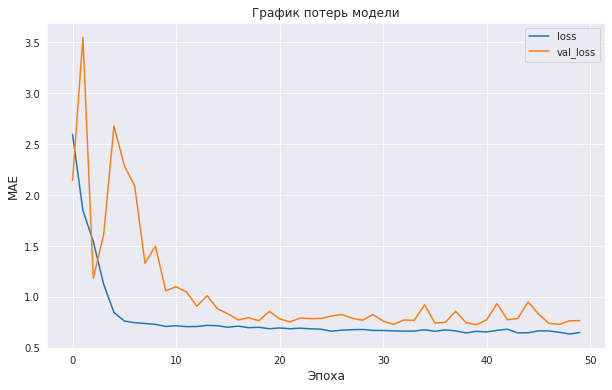

In [47]:
# визуализируем потери модели
history = itogo_mn
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь модели', size=12)
plt.ylabel('МАЕ', size=12)    # наша средняя квадратичная ошибка
plt.xlabel('Эпоха', size=12)
plt.legend(['loss', 'val_loss'], loc='best') ; # ошибка на обучаемой и на тестовой выборке

In [48]:
# делаем предикт
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

9/9 [==============================] - 0s 2ms/step


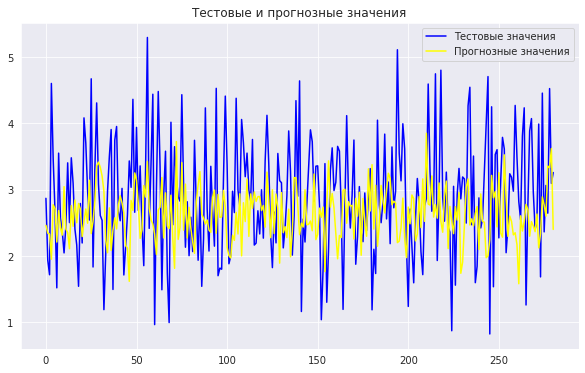

In [49]:
# визуализируем график оригинального и предсказанного значения У
plt.figure(figsize=(10,6))
plt.title('Тестовые и прогнозные значения', size=12)
plt.plot(original_mn, color='blue', label = 'Тестовые значения')
plt.plot(predicted_mn, color='yellow', label = 'Прогнозные значения')
plt.legend(loc='best') ;

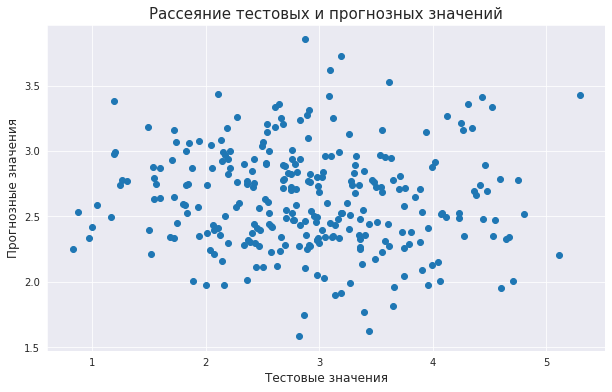

In [50]:
# визуализируем график оригинального и предсказанного значения У (скатерплот) 
plt.figure(figsize=(10,6))
plt.title('Рассеяние тестовых и прогнозных значений', size=15)
plt.scatter(original_mn, predicted_mn)
plt.xlabel('Тестовые значения', size=12)
plt.ylabel('Прогнозные значения', size=12) ;

In [51]:
model_mn.save('model_vkr')